<a href="https://colab.research.google.com/github/EricSiq/India_Missing_Persons_Analysis_2017-2022/blob/main/Ideation/USL_A2_13_040_041TestWTrans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Problem Statement: This notebook is designed to analyze India's missing persons' data by grouping similar records together using clustering algorithms.**

Why is Clustering Important for Missing Persons Data?

*   Identifying Patterns: When data is organized into clusters, it becomes easier to see patterns that might not be obvious when looking at individual cases. For example, if several missing persons cases are concentrated in a specific area, clustering can bring this pattern to light.

*    Finding Hotspots: A “hotspot” is an area or group where something (in this case, missing persons) happens more frequently. .

*    Resource Allocation: Law enforcement and community support services can use hotspot information to focus their efforts where they are needed the most. This means that if a cluster indicates a high concentration of missing persons in one area, it can guide decisions about where to conduct investigations or allocate additional resources.

*    Preventive Measures: Finding clusters in the data can also lead to understanding underlying causes or risk factors. Once these factors are better understood, communities and authorities can put in place preventive measures to reduce future incidents.

[Kaggle Dataset: 5 Years Districtwise India Missing Person's Dataset](https://www.kaggle.com/datasets/ericsiq/india-5-years-districtwise-missing-persons-dataset)


[GitHub Repo](https://github.com/EricSiq/India_Missing_Persons_Analysis_2017-2022)

In [1]:
!pip install tabulate



# Libraries Used:









**Importing Python Libraries**

In [2]:
import pandas as pd         # For data manipulation and analysis
import numpy as np          # For numerical operations
import seaborn as sns       #For visualisation & graphing
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns       # For enhanced visualization
from tabulate import tabulate #For tabular outputs
from sklearn.preprocessing import StandardScaler # For Feature scaling
from sklearn.preprocessing import RobustScaler # For feature scaling
from sklearn.metrics import silhouette_score #Accuracy Metrics
from sklearn.decomposition import PCA #For graphical representation
from sklearn.cluster import KMeans #For k means clustering
from sklearn.neighbors import NearestNeighbors #For validating DBSCAN
from sklearn.cluster import DBSCAN #For DBSCAN operations
from sklearn.metrics import silhouette_score, davies_bouldin_score #Accuracy metrics
from scipy.cluster.hierarchy import dendrogram, linkage #For validating Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering #For Agglomerative clustering operationg
from sklearn.metrics.pairwise import euclidean_distances #for validating divisive clustering



# Data Loading



> Upon loading of the datasets, it is noticed there is a serious disrepancy between column values for age groups.



The age group classifications differ notably between the 2018–2020 and 2021–2022 datasets:


2018–2020: Age brackets are more granular and traditional:

Below 5 years

5–14 years

14–18 years

18–30 years

30–45 years

45–60 years

60 years & above



In 2021–2022: The classification structure has changed:

Below 12 years

12–16 years

16–18 years

18 years & above

In [3]:
%matplotlib inline

# Setting a style for seaborn plots
sns.set(style="whitegrid")

In [4]:

# Section 1: Define file paths for each year's data.
file_paths = {
    2018: "/content/DistrictwiseMissingPersons2018.csv",
    2019: "/content/DistrictwiseMissingPersons2019.csv",
    2020: "/content/DistrictwiseMissingPersons2020.csv",
    2021: "/content/DistrictwiseMissingPersons2021.csv",
    2022: "/content/DistrictwiseMissingPersons2022.csv"
}




> Due to disrepancies between columns, we need to remove unnessessary columns and make them uniform across 2018-2022 years.

> We have to group all age groups into either Children or 18+ age groups to simplify the age groups.



#   Data Cleaning:
1.     - Reading the CSV files into pandas dataframes.
2.     - Removing Unnessessary Column values
3.     - Examining initial structure & description of the data.

In [5]:

# A list to hold all processed DataFrames.
dfs = []

# Section 2: Process each dataset according to its year.
for year, path in file_paths.items():
    # Load file with fallback encoding if necessary
    try:
        df = pd.read_csv(path)
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(path, encoding='ISO-8859-1')
            print(f"Used fallback encoding for {year}")
        except Exception as e:
            print(f"Failed to load {year}: {e}")
            continue

    # Add the year column if not already present.
    df['Year'] = year

    # Remove any leading/trailing whitespace from column headers.
    df.columns = df.columns.str.strip()

    if year <= 2020:
        # For datasets 2018-2020, we have the detailed age-group columns.
        # Male columns
        male_below_18 = [
            'Male_Below_5_years',
            'Male_5_years_&_Above_Below_14_years',
            'Male_14_years_&_Above_Below_18_years'
        ]
        male_above_18 = [
            'Male_18_years_&_Above_Below_30_years',
            'Male_30_years_&_Above_Below_45_years',
            'Male_45_years_&_Above_Below_60_years',
            'Male_60_years_&_Above'
        ]

        # Female columns
        female_below_18 = [
            'Female_Below_5_years',
            'Female_5_years_&_Above_Below_14_years',
            'Female_14_years_&_Above_Below_18_years'
        ]
        female_above_18 = [
            'Female_18_years_&_Above_Below_30_years',
            'Female_30_years_&_Above_Below_45_years',
            'Female_45_years_&_Above_Below_60_years',
            'Female_60_years_&_Above'
        ]

        # Transgender columns
        trans_below_18 = [
            'Transgender_Below_5_years',
            'Transgender_5_years_&_Above_Below_14_years',
            'Transgender_14_years_&_Above_Below_18_years'
        ]
        trans_above_18 = [
            'Transgender_18_years_&_Above_Below_30_years',
            'Transgender_30_years_&_Above_Below_45_years',
            'Transgender_45_years_&_Above_Below_60_years',
            'Transgender_60_years_&_Above'
        ]

        # Total columns
        total_below_18 = [
            'Total_Below_5_years',
            'Total_5_years_&_Above_Below_14_years',
            'Total_14_years_&_Above_Below_18_years'
        ]
        total_above_18 = [
            'Total_18_years_&_Above_Below_30_years',
            'Total_30_years_&_Above_Below_45_years',
            'Total_45_years_&_Above_Below_60_years',
            'Total_60_years_&_Above'
        ]

        # Sum up the relevant columns for each group.
        df['Male_Below_18'] = df[male_below_18].sum(axis=1)
        df['Male_18_and_above'] = df[male_above_18].sum(axis=1)

        df['Female_Below_18'] = df[female_below_18].sum(axis=1)
        df['Female_18_and_above'] = df[female_above_18].sum(axis=1)

        df['Transgender_Below_18'] = df[trans_below_18].sum(axis=1)
        df['Transgender_18_and_above'] = df[trans_above_18].sum(axis=1)

        df['Total_Below_18'] = df[total_below_18].sum(axis=1)
        df['Total_18_and_above'] = df[total_above_18].sum(axis=1)

        # Drop the original detailed columns.
        drop_cols = (male_below_18 + male_above_18 +
                     female_below_18 + female_above_18 +
                     trans_below_18 + trans_above_18 +
                     total_below_18 + total_above_18)
        df.drop(columns=drop_cols, inplace=True, errors='ignore')

    else:
        # For 2021-2022, the files already include aggregated age-group columns.
        # Rename them to standardized names.
        rename_map = {
            'Male_Children': 'Male_Below_18',
            'Male_18_years_&_Above': 'Male_18_and_above',
            'Female_Children': 'Female_Below_18',
            'Female_18_years_&_Above': 'Female_18_and_above',
            'Transgender_Children': 'Transgender_Below_18',
            'Transgender_18_years_&_Above': 'Transgender_18_and_above',
            'Total_Children': 'Total_Below_18',
            'Total_18_years_&_Above': 'Total_18_and_above'
        }
        df.rename(columns=rename_map, inplace=True)

        # Drop any extra detailed age-group columns that are not needed.
        drop_cols = [
            'Male_Below_12_years', 'Male_12_years_&_Above_Below_16_years', 'Male_16_years_&_Above_Below_18_years',
            'Female_Below_12_years', 'Female_12_years_&_Above_Below_16_years', 'Female_16_years_&_Above_Below_18_years',
            'Transgender_Below_12_years', 'Transgender_12_years_&_Above_Below_16_years', 'Transgender_16_years_&_Above_Below_18_years',
            'Total_Below_12_years', 'Total_12_years_&_Above_Below_14_years', 'Total_14_years_&_Above_Below_18_years'
        ]
        df.drop(columns=drop_cols, inplace=True, errors='ignore')

    # Append the processed DataFrame to our list.
    dfs.append(df)
    print(f"Loaded and processed data for {year} with shape: {df.shape}")

# Optionally, display a preview of the first processed DataFrame.
print("\nPreview of the processed dataset for the first file:")
print(tabulate(dfs[0].head(10), headers='keys', tablefmt='pretty'))

Loaded and processed data for 2018 with shape: (892, 15)
Loaded and processed data for 2019 with shape: (912, 15)
Loaded and processed data for 2020 with shape: (932, 15)
Loaded and processed data for 2021 with shape: (941, 15)
Loaded and processed data for 2022 with shape: (969, 15)

Preview of the processed dataset for the first file:
+---+------+----------------+------------------+------------+--------------+-------------------+-------------+---------------+-------------------+-----------------+---------------------+----------------------+--------------------------+----------------+--------------------+
|   | Year |     State      |     District     | Total_Male | Total_Female | Total_Transgender | Grand_Total | Male_Below_18 | Male_18_and_above | Female_Below_18 | Female_18_and_above | Transgender_Below_18 | Transgender_18_and_above | Total_Below_18 | Total_18_and_above |
+---+------+----------------+------------------+------------+--------------+-------------------+-------------+-

In [6]:
print(tabulate(dfs[1].head(10), headers='keys', tablefmt='pretty'))

+---+------+----------------+------------------+------------+--------------+-------------------+-------------+---------------+-------------------+-----------------+---------------------+----------------------+--------------------------+----------------+--------------------+
|   | Year |     State      |     District     | Total_Male | Total_Female | Total_Transgender | Grand_Total | Male_Below_18 | Male_18_and_above | Female_Below_18 | Female_18_and_above | Transgender_Below_18 | Transgender_18_and_above | Total_Below_18 | Total_18_and_above |
+---+------+----------------+------------------+------------+--------------+-------------------+-------------+---------------+-------------------+-----------------+---------------------+----------------------+--------------------------+----------------+--------------------+
| 0 | 2019 | Andhra Pradesh |    Anantapur     |    257     |     766      |         0         |    1023     |      60       |        197        |       280       |        486

In [7]:
print(tabulate(dfs[2].head(10), headers='keys', tablefmt='pretty'))

+---+------+----------------+---------------+------------+--------------+-------------------+-------------+---------------+-------------------+-----------------+---------------------+----------------------+--------------------------+----------------+--------------------+
|   | Year |     State      |   District    | Total_Male | Total_Female | Total_Transgender | Grand_Total | Male_Below_18 | Male_18_and_above | Female_Below_18 | Female_18_and_above | Transgender_Below_18 | Transgender_18_and_above | Total_Below_18 | Total_18_and_above |
+---+------+----------------+---------------+------------+--------------+-------------------+-------------+---------------+-------------------+-----------------+---------------------+----------------------+--------------------------+----------------+--------------------+
| 0 | 2020 | Andhra Pradesh |   Anantapur   |    209     |     869      |         0         |    1078     |      32       |        177        |       284       |         585         | 

In [8]:
print(tabulate(dfs[3].head(10), headers='keys', tablefmt='pretty'))

+---+------+----------------+---------------+------------+---------------+-------------------+--------------+-----------------+---------------------+-------------------+----------------------+--------------------------+-------------+----------------+--------------------+
|   | Year |     State      |   District    | Total_Male | Male_Below_18 | Male_18_and_above | Total_Female | Female_Below_18 | Female_18_and_above | Total_Transgender | Transgender_Below_18 | Transgender_18_and_above | Grand_Total | Total_Below_18 | Total_18_and_above |
+---+------+----------------+---------------+------------+---------------+-------------------+--------------+-----------------+---------------------+-------------------+----------------------+--------------------------+-------------+----------------+--------------------+
| 0 | 2021 | Andhra Pradesh |   Anantapur   |    291     |      43       |        248        |     1224     |       446       |         778         |         0         |          0    

In [9]:
print(tabulate(dfs[4].head(10), headers='keys', tablefmt='pretty'))

+---+------+----------------+--------------------------+------------+---------------+-------------------+--------------+-----------------+---------------------+-------------------+----------------------+--------------------------+-------------+----------------+--------------------+
|   | Year |     State      |         District         | Total_Male | Male_Below_18 | Male_18_and_above | Total_Female | Female_Below_18 | Female_18_and_above | Total_Transgender | Transgender_Below_18 | Transgender_18_and_above | Grand_Total | Total_Below_18 | Total_18_and_above |
+---+------+----------------+--------------------------+------------+---------------+-------------------+--------------+-----------------+---------------------+-------------------+----------------------+--------------------------+-------------+----------------+--------------------+
| 0 | 2022 | Andhra Pradesh |  Alluri Sitharama Raju   |     36     |       8       |        28         |      80      |       54        |         26  

#   Pre-processing:
1.      - Analysing dataset values
2.      - Merging the datasets.
2.     - Handling missing values and data type conversions.

In [10]:
print("Columns in the DataFrame:")
print(df.columns.tolist())

Columns in the DataFrame:
['Year', 'State', 'District', 'Total_Male', 'Male_Below_18', 'Male_18_and_above', 'Total_Female', 'Female_Below_18', 'Female_18_and_above', 'Total_Transgender', 'Transgender_Below_18', 'Transgender_18_and_above', 'Grand_Total', 'Total_Below_18', 'Total_18_and_above']


In [11]:
# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

# Display combined dataframe shape and basic info
print("Combined dataset shape:", data.shape)
print("\nDataset Info:")
data.info()

# Check for missing values in each column
missing_values = data.isna().sum()
print("\nMissing Values per column:\n", missing_values)

Combined dataset shape: (4646, 15)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646 entries, 0 to 4645
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      4646 non-null   int64  
 1   State                     4646 non-null   object 
 2   District                  4646 non-null   object 
 3   Total_Male                4646 non-null   int64  
 4   Total_Female              4646 non-null   int64  
 5   Total_Transgender         4646 non-null   int64  
 6   Grand_Total               4646 non-null   int64  
 7   Male_Below_18             4646 non-null   int64  
 8   Male_18_and_above         4646 non-null   float64
 9   Female_Below_18           4646 non-null   int64  
 10  Female_18_and_above       4646 non-null   float64
 11  Transgender_Below_18      4646 non-null   int64  
 12  Transgender_18_and_above  4646 non-null   int64  
 13  Total_Below_1


*Handling Missing Values:*

  - Remove rows with missing key values.

In [12]:
# Display all rows that have at least one missing value
rows_with_missing = data[data.isna().any(axis=1)]
print("\nRows with missing values:")
print(rows_with_missing)

# Create a new DataFrame by removing rows with missing values
data_clean = data.dropna()
data_clean.shape
data_clean.to_csv("data_clean.csv", index=False)




Rows with missing values:
Empty DataFrame
Columns: [Year, State, District, Total_Male, Total_Female, Total_Transgender, Grand_Total, Male_Below_18, Male_18_and_above, Female_Below_18, Female_18_and_above, Transgender_Below_18, Transgender_18_and_above, Total_Below_18, Total_18_and_above]
Index: []


#   Exploratory Data Analysis (EDA):
1.      - Statistical summary.
2.      - Distribution of key variables.
3.     - Trends across years and per district.
4.     - Visualizations with appropriate parameters.


In [13]:
# Statistical Summary
print("\nStatistical Summary:")
print(data_clean.describe())


Statistical Summary:
              Year    Total_Male  Total_Female  Total_Transgender  \
count  4646.000000   4646.000000   4646.000000        4646.000000   
mean   2020.039389    270.905295    539.453078           0.446406   
std       1.414198   1266.756084   2374.076027          10.881138   
min    2018.000000      0.000000      0.000000           0.000000   
25%    2019.000000      8.000000     10.000000           0.000000   
50%    2020.000000     52.500000    112.000000           0.000000   
75%    2021.000000    166.000000    370.750000           0.000000   
max    2022.000000  30355.000000  40725.000000         488.000000   

        Grand_Total  Male_Below_18  Male_18_and_above  Female_Below_18  \
count   4646.000000    4646.000000        4646.000000      4646.000000   
mean     810.804778      39.937365         230.967284       115.043048   
std     3601.558745     161.787144        1134.002355       522.015338   
min        0.000000       0.000000           0.000000       

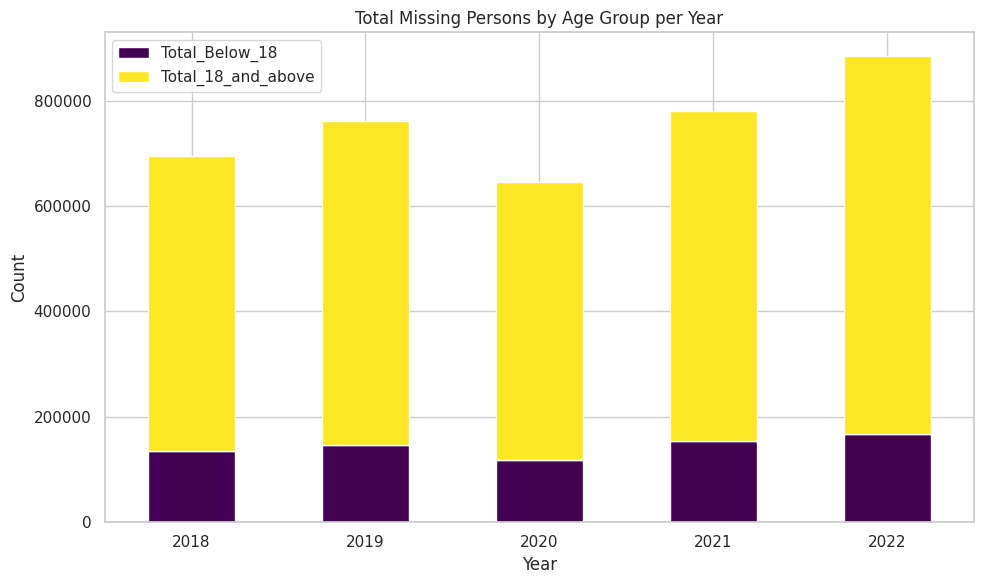

In [14]:
# Total missing cases per year
yearly_totals = data_clean.groupby('Year')[['Total_Below_18', 'Total_18_and_above']].sum()
yearly_totals.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title("Total Missing Persons by Age Group per Year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

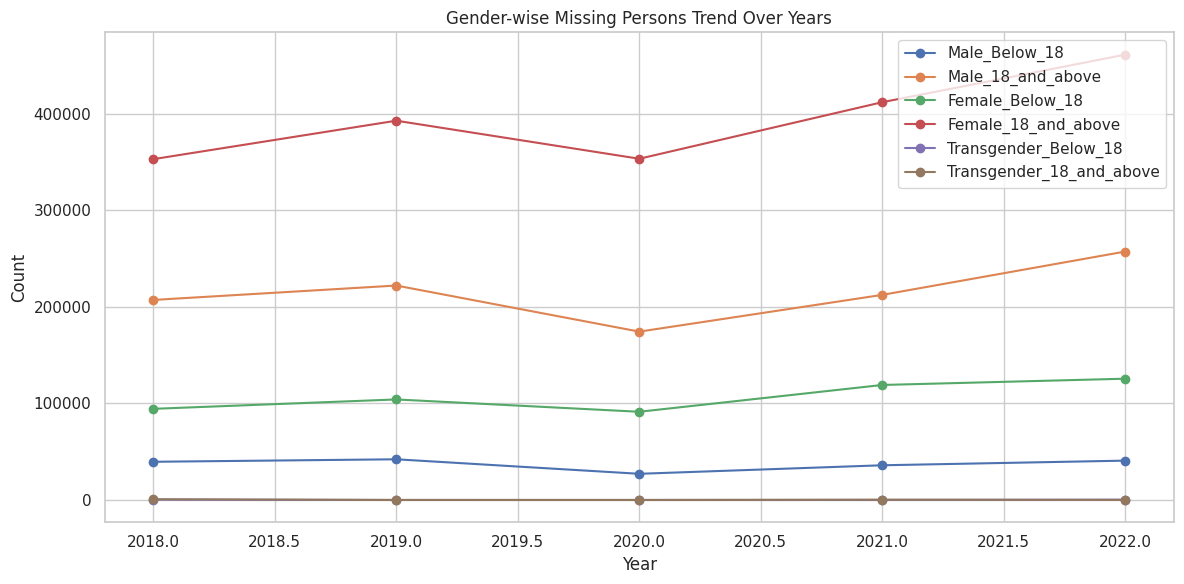

In [15]:
# Gender-wise missing trends
gender_trends = data_clean.groupby('Year')[
    ['Male_Below_18', 'Male_18_and_above',
     'Female_Below_18', 'Female_18_and_above',
     'Transgender_Below_18', 'Transgender_18_and_above']
].sum()

gender_trends.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Gender-wise Missing Persons Trend Over Years")
plt.ylabel("Count")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


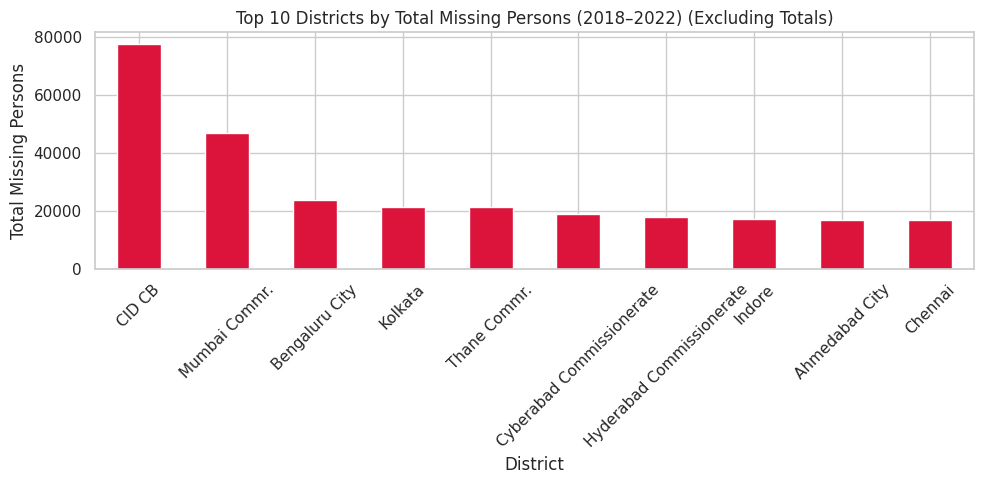

In [16]:
# Top 10 Districts with Most Total Missing Persons

# Clean the district names for consistent comparison
data_clean['District_clean'] = data_clean['District'].str.strip().str.lower()

# Filter out 'total' and 'total districts' properly
filtered_data = data_clean[~data_clean['District_clean'].isin(['total', 'total districts'])].copy()

# Compute total missing persons
filtered_data['Total_Missing'] = filtered_data['Total_Below_18'] + filtered_data['Total_18_and_above']

# Group and plot top 10 districts
top_districts = filtered_data.groupby('District')['Total_Missing'].sum().sort_values(ascending=False).head(10)

top_districts.plot(kind='bar', figsize=(10, 5), color='crimson')
plt.title("Top 10 Districts by Total Missing Persons (2018–2022) (Excluding Totals)")
plt.ylabel("Total Missing Persons")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


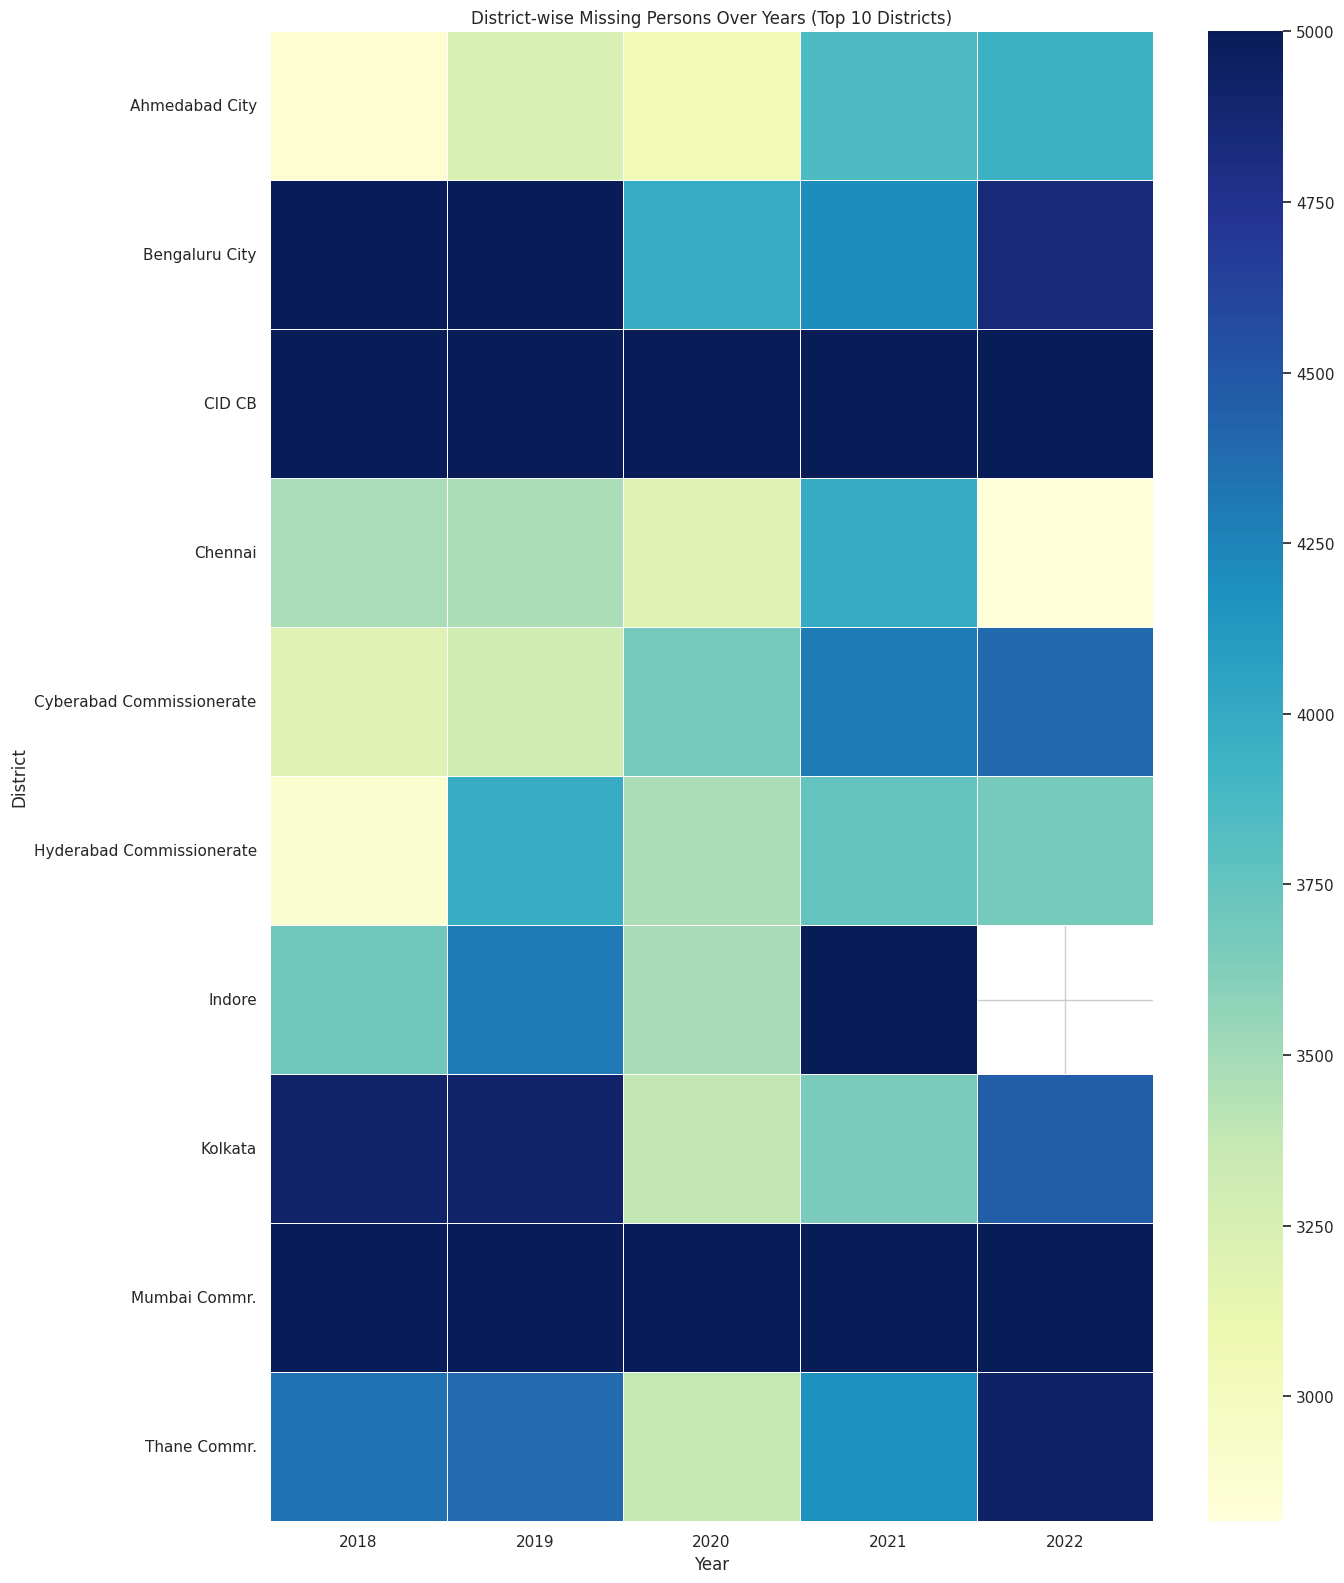

In [17]:
# Apply the same cleaning to the district names in 'top_districts'
top_districts = top_districts.index.str.strip().str.lower()

# Now, filter based on the cleaned district names
top10_data = filtered_data[filtered_data['District_clean'].isin(top_districts)].copy()

# Rest of the code remains the same
pivot_table = top10_data.pivot_table(
    index='District',         # Rows: Districts
    columns='Year',           # Columns: Years
    values='Total_Missing',   # Values: Total missing persons
    aggfunc='sum'             # Aggregate function: sum
)

plt.figure(figsize=(14, 16))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5, vmax=5000)
plt.title("District-wise Missing Persons Over Years (Top 10 Districts)")
plt.xlabel("Year")
plt.ylabel("District")
plt.tight_layout()
plt.show()

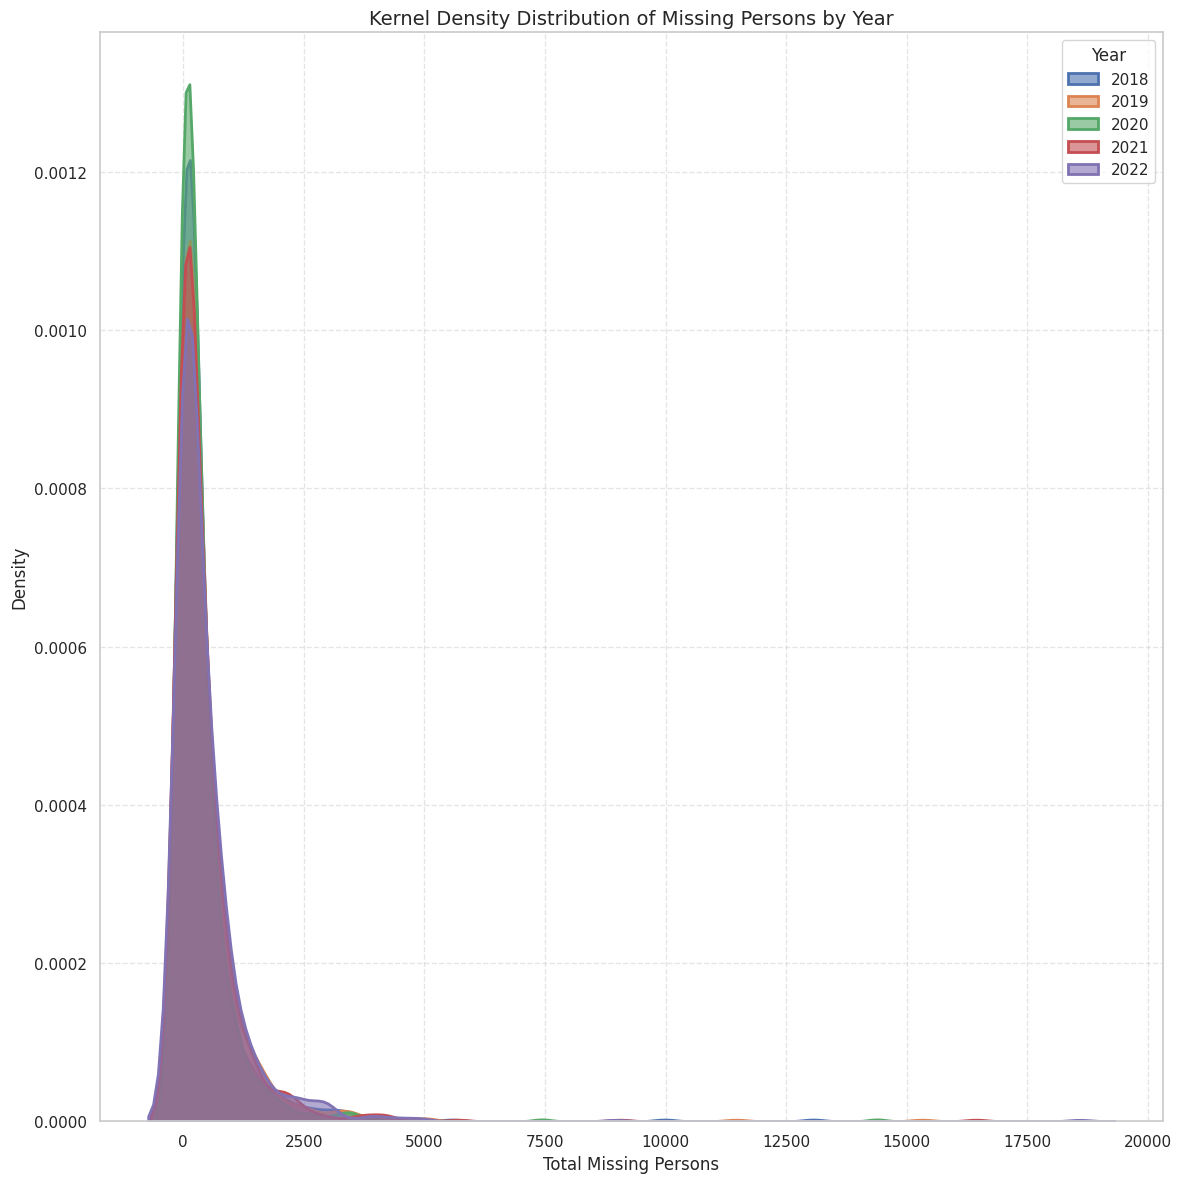

In [18]:
plt.figure(figsize=(12,12))

# Create KDE plots for each year with distinct colors
for year in sorted(filtered_data['Year'].unique()):
    sns.kdeplot(
        filtered_data[filtered_data['Year'] == year]['Total_Missing'],
        label=str(year),
        fill=True,
        linewidth=2,
        alpha=0.6
    )

plt.title("Kernel Density Distribution of Missing Persons by Year", fontsize=14)
plt.xlabel("Total Missing Persons", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Feature Scaling

> In order to avoid inaccurate features and collinearity;

The dataset has columns such as:

*   Total Columns: Total_Male, Total_Female, Total_Transgender, and Grand_Total

*   Some columns are simply sums of others (for example, if Grand_Total equals the sum of Total_Male, Total_Female, and Total_Transgender, or if the overall totals are the sums of the age-specific columns), then including both could introduce collinearity.






> 'Male_Below_18', 'Male_18_and_above', 'Female_Below_18', 'Female_18_and_above' are the 4 independent parameters used to avoid multicollinearity and noise values



In [21]:

# Select independent 4 numeric features for clustering
features = ['Male_Below_18', 'Male_18_and_above', 'Female_Below_18', 'Female_18_and_above','Transgender_Below_18','Transgender_18_and_above']
X = data_clean[features].copy()

# Retain label columns for later interpretation
labels = data_clean[['State', 'District', 'Year']].copy()

"""
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)"""


'\n# Standardize the features\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)'

In [22]:
#scaling and standarizing features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


**Determining the optimal number of clusters to use for K Means using elbow method:**

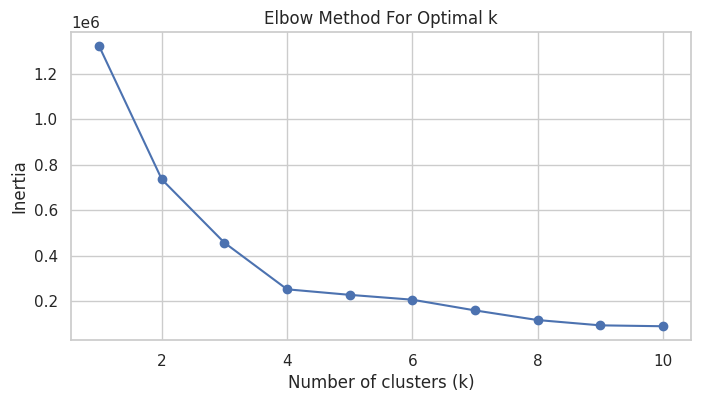

In [23]:

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


*    The inertia drops sharply from k=1 to k=2 and then to k=3. This means adding more clusters initially drastically reduces the within-cluster variance.
*    After k=3, the decrease in inertia becomes less pronounced. The line starts to flatten out, forming an "elbow."
*    While there's a slight decrease even after k=3, the benefit of adding more clusters diminishes significantly.

# K Means Clustering

In [24]:

#Elbow Method
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to your labels DataFrame
labels['Cluster'] = clusters


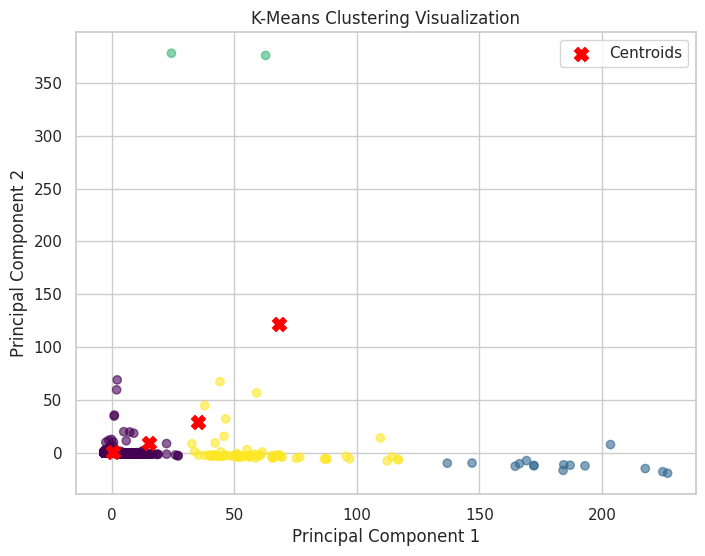

In [25]:


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=100, marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Visualization')
plt.legend()
plt.show()


*The plot suggests that the K-Means algorithm has done a decent job of separating the data into visually discernible groups.*

In [26]:
KM_sil_score = silhouette_score(X_scaled, clusters)
print(f'K-Means Clustering Silhouette Score: {KM_sil_score:.4f}')
KM_db_score = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Score : {KM_db_score:.4f}")

K-Means Clustering Silhouette Score: 0.9454
Davies-Bouldin Score : 0.5551



🔹 Silhouette Score (0.9446)
Ranges from -1 to +1

A score closer to 1 means that the clusters are well separated and compact.

0.9446 suggests:
Data points are very close to the center of their own cluster and far from other clusters

🔹 Davies-Bouldin Score (0.5802)
Ranges from 0 to ∞

Lower is better

A value close to 0 means: Clusters are well separated And internally consistent

Our value (0.58) suggests minimal overlap between clusters.

In [27]:

# Combine the original features with cluster labels
clustered_data = pd.concat([X, labels['Cluster']], axis=1)

# Calculate mean values for each cluster
cluster_means = clustered_data.groupby('Cluster').mean()
print(cluster_means)


         Male_Below_18  Male_18_and_above  Female_Below_18  \
Cluster                                                      
0            21.078324         119.750110        58.163888   
1          1716.266667       16249.400000      6023.933333   
2           388.500000        1263.500000       829.500000   
3           886.661972        3957.535211      2498.042254   

         Female_18_and_above  Transgender_Below_18  Transgender_18_and_above  
Cluster                                                                       
0                   214.8405              0.056604                  0.071961  
1                 27849.8000              0.200000                  2.000000  
2                  2232.5000            132.000000                356.000000  
3                  8033.0000              3.225352                  3.521127  


*Pairplot for Feature Distribution:*

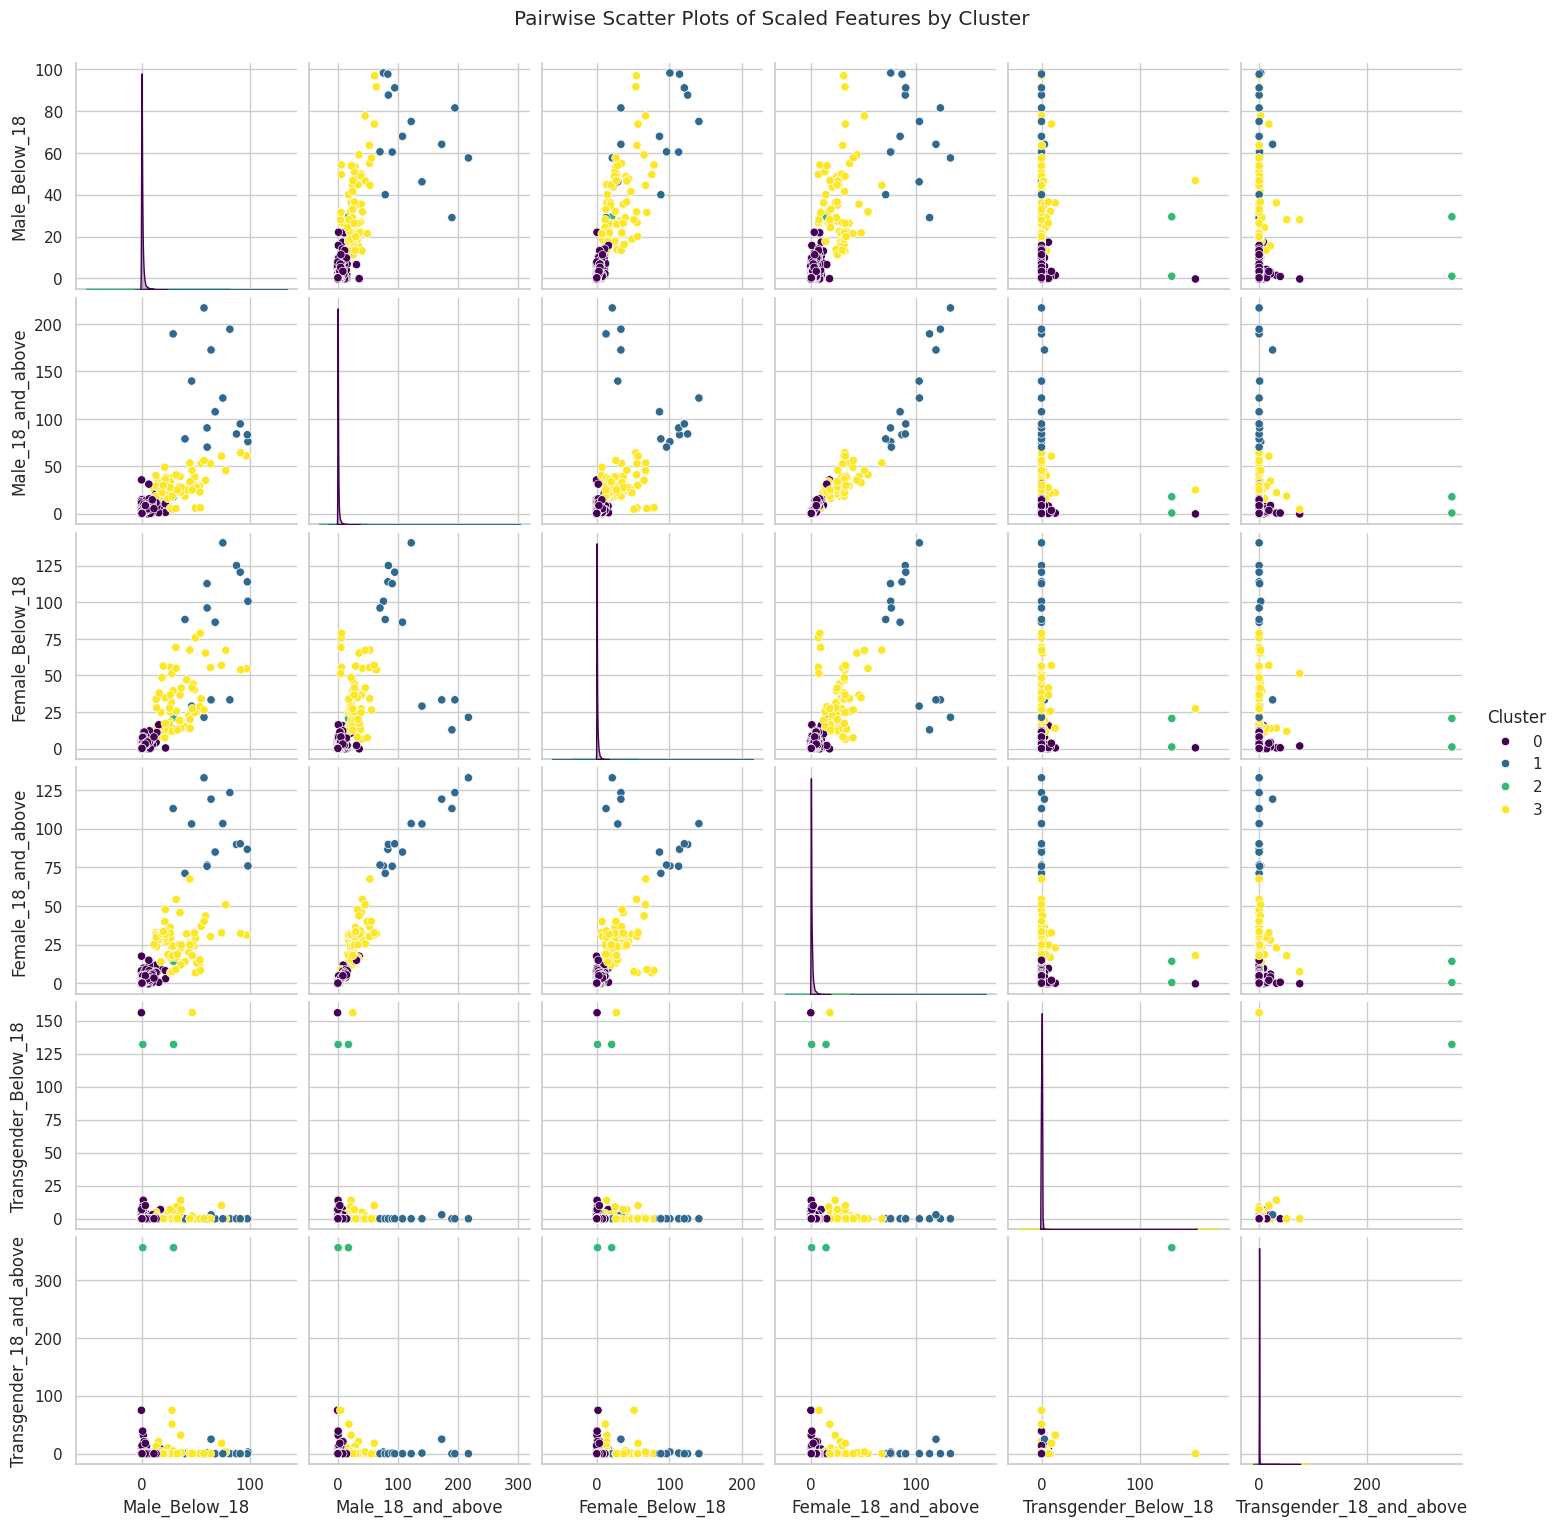

In [28]:
# Combine the scaled features and cluster labels into one DataFrame for plotting
df_plot = pd.DataFrame(X_scaled, columns=features)
df_plot['Cluster'] = kmeans.labels_

sns.pairplot(df_plot, hue='Cluster', palette='viridis')
plt.suptitle('Pairwise Scatter Plots of Scaled Features by Cluster', y=1.02)
plt.show()


This kind of visualization helps you understand the characteristics of each cluster in terms of the original features.

You can see which features tend to be high or low for each cluster, and if there are any interesting patterns or correlations within or between clusters across different feature pairs.

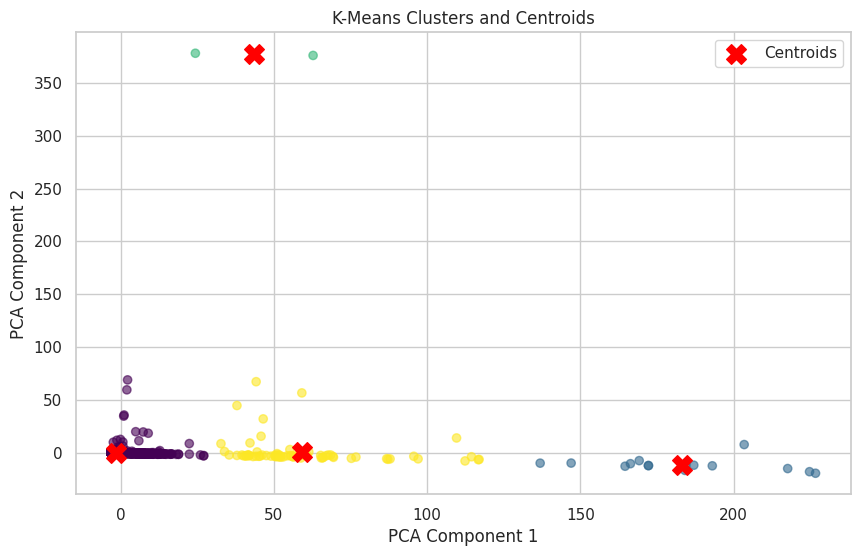

In [29]:
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters and Centroids')
plt.legend()
plt.show()


*    The code first calculates the cluster centroids from the K-Means algorithm.
*    Then, it transforms these high-dimensional centroids using the same PCA transformation that was applied to the original data, so they can be plotted in the reduced 2D space.
*    This plot visually confirms the centers of the identified clusters in the reduced dimensionality, giving you a sense of where the "average" point lies for each group after the data has been simplified by PCA.

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

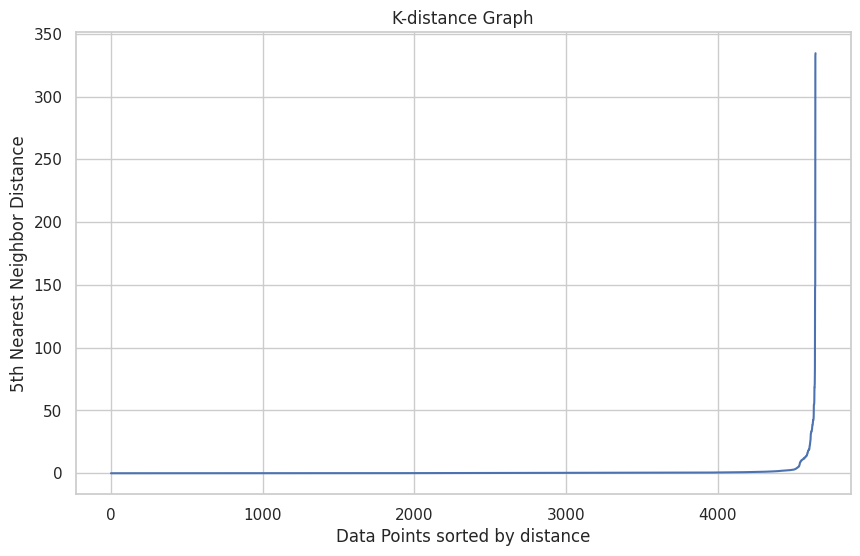

In [30]:


# Use min_samples (say 5) to compute the k-nearest neighbors distance
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort and plot the distances for the 5th nearest neighbor
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('K-distance Graph')
plt.show()


From the inspection of the above graph:

*    The elbow seems to occur around a distance of approximately 1.8 to 2.2 on the y-axis.

*    This implies that a good starting value for eps is around 2.0 (or just below it).

*    Using a smaller eps (like 0.5) was too restrictive, treating most points as noise and merging the rest into a single cluster.

In [31]:

dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Check clustering results
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")


Estimated number of clusters: 5
Estimated number of noise points: 176


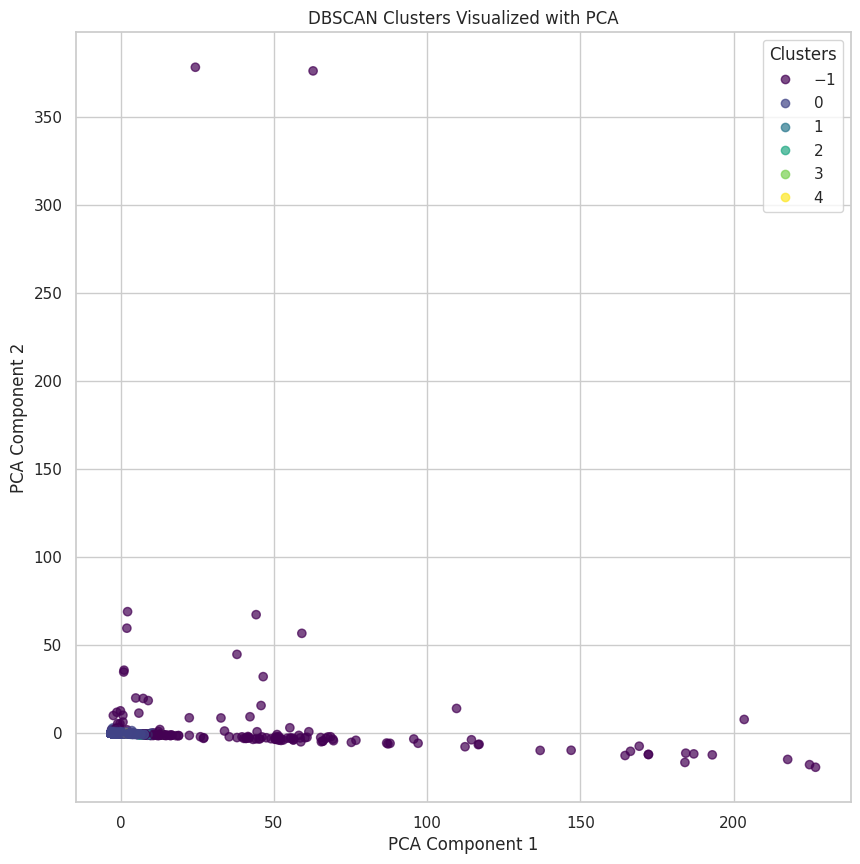

In [32]:
# Use PCA to reduce dimensionality for simple visualization:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 10))
# Use the DBSCAN labels for color coding
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clusters Visualized with PCA')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

1.    The code again uses PCA to reduce the data to two principal components for easy plotting.
2.    The scatter plot displays each data point in this 2D PCA space.

3.    The plot visually shows the clusters that DBSCAN has identified based on density. You can see groups of points that are close together in the original high-dimensional space, projected onto two dimensions.
4.    The scattered points with the '-1' label are the outliers or sparser regions that didn't form a cluster.

In [33]:
# DBSCAN marks noise points as -1.
labels['Cluster'] = dbscan_labels
print("\nCluster assignment on label data:")
print(labels.head())


Cluster assignment on label data:
             State          District  Year  Cluster
0   Andhra Pradesh         Anantapur  2018        0
1   Andhra Pradesh          Chittoor  2018        0
2   Andhra Pradesh          Cuddapah  2018        0
3   Andhra Pradesh     East Godavari  2018        0
4   Andhra Pradesh  Guntakal Railway  2018        0


In [34]:

# Filter out noise points (-1) for silhouette score
mask = dbscan.labels_ != -1
if len(set(dbscan.labels_[mask])) > 1:  # Silhouette needs at least 2 clusters (excluding noise)
    DBSCAN_sil_score = silhouette_score(X_scaled[mask], dbscan.labels_[mask])
    print(f"Silhouette Score (excluding noise): {DBSCAN_sil_score:.4f}")
else:
    print("Silhouette Score: Not applicable (less than 2 clusters)")



Silhouette Score (excluding noise): 0.7015


In [35]:

# Davies-Bouldin Score can include all clusters, including noise
# it assumes labels >= 0, so we exclude noise here too
if len(set(dbscan.labels_[mask])) > 1:
    DBSCAN_db_score = davies_bouldin_score(X_scaled[mask], dbscan.labels_[mask])
    print(f"Davies-Bouldin Score (excluding noise): {DBSCAN_db_score:.4f}")
else:
    print("Davies-Bouldin Score: Not applicable")

Davies-Bouldin Score (excluding noise): 0.3800


# Agglomerative Clustering (bottom-up approach)

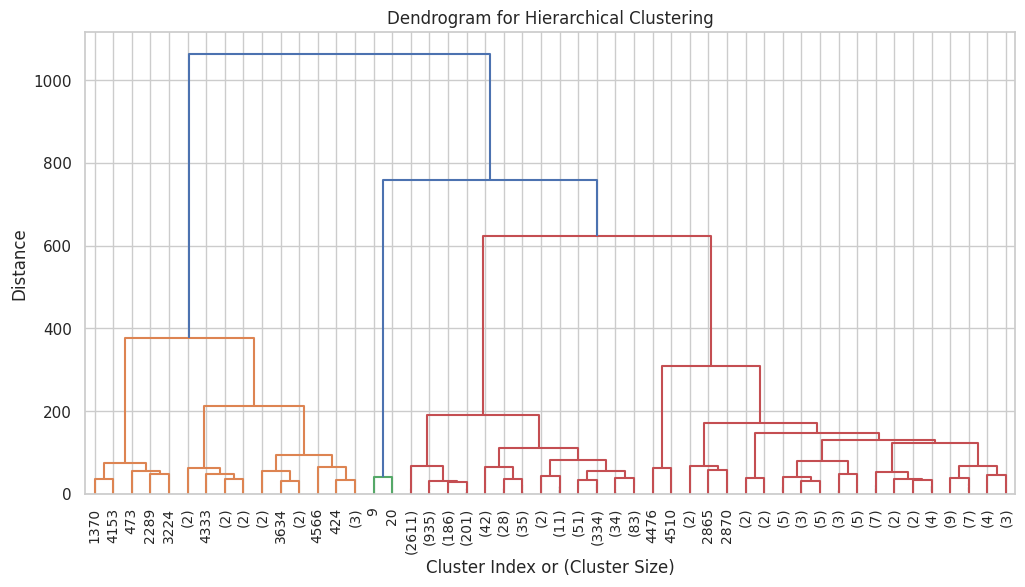

In [36]:

# Perform agglomerative clustering with the Ward method
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z,
           truncate_mode='lastp',    # show only the last p merged clusters
           p=50,
           leaf_rotation=90.,
           leaf_font_size=10.,
           show_contracted=True)    #  get a distribution impression of the distances
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Cluster Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()


*    The dendrogram is a tree-like diagram that visually represents these merging steps.
*    The height of the vertical lines indicates the distance at which clusters were merged.
*    The horizontal lines connect the clusters that were merged at that particular distance.

*    By examining the dendrogram, you can infer potential optimal numbers of clusters. Look for significant increases in the vertical distances.
*    A large jump suggests that merging those clusters would be combining relatively dissimilar groups.

In [37]:
# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5)
labels = agglo.fit_predict(X_scaled)

# Evaluation Metrics
AC_sil_score = silhouette_score(X_scaled, labels)
AC_db_score = davies_bouldin_score(X_scaled, labels)

print(f"Estimated number of clusters: {len(set(labels))}")
print(f"Silhouette Score: {AC_sil_score:.4f}")
print(f"Davies-Bouldin Score: {AC_db_score:.4f}")

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



Estimated number of clusters: 5
Silhouette Score: 0.9428
Davies-Bouldin Score: 0.5775


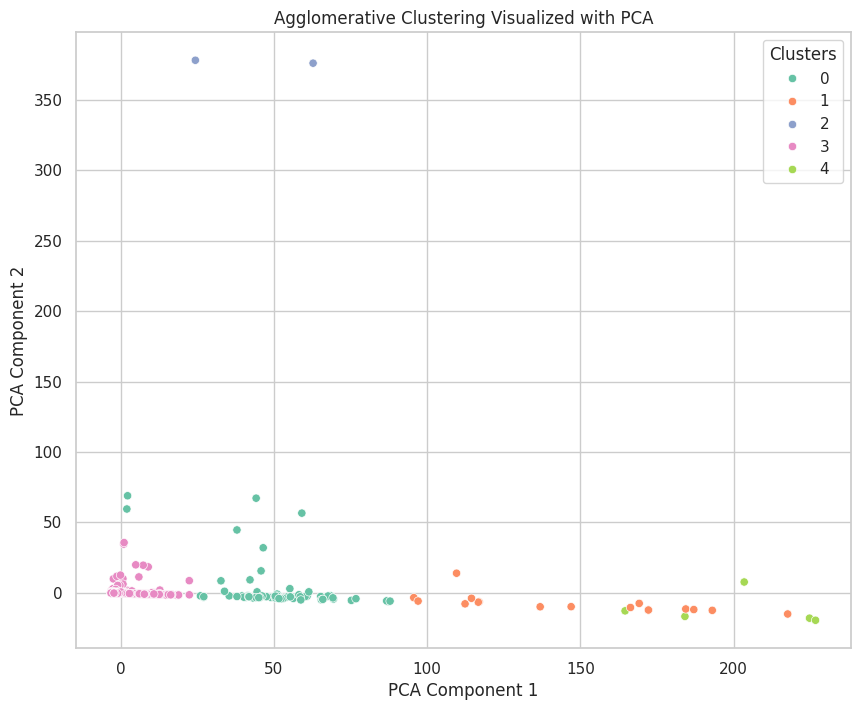

In [38]:

# Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set2", legend="full")
plt.title("Agglomerative Clustering Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Clusters")
plt.show()

# Divisive Clustering (top-down approach)

In [39]:

# Manual DIANA-Like Clustering with Index Tracking
from sklearn.metrics.pairwise import euclidean_distances

def average_distance(data):
    """Calculates the average pairwise distance within a cluster."""
    distances = euclidean_distances(data, data)
    # Return the average of the upper triangular part (excluding diagonal)
    return np.sum(distances) / (len(data) * (len(data) - 1))

def split_cluster(data):
    """Splits a cluster into two based on furthest points."""
    # Find two points with maximum distance
    distances = euclidean_distances(data, data)
    max_dist_idx = np.unravel_index(np.argmax(distances), distances.shape)

    # These points become centroids of new clusters
    centroid1 = data[max_dist_idx[0]]
    centroid2 = data[max_dist_idx[1]]

    return [centroid1], [centroid2]  # Return as list of lists
# Each cluster holds (data_points, indices)
clusters = [(X_scaled, np.arange(len(X_scaled)))]

k_max = 4

while len(clusters) < k_max:
    # Find cluster with max average pairwise distance
    avg_dists = [average_distance(cluster[0]) for cluster in clusters]
    max_idx = np.argmax(avg_dists)

    to_split_data, to_split_indices = clusters.pop(max_idx)

    # Split data into two groups
    c1_data, c2_data = split_cluster(to_split_data)

    # Track which points went where
    c1_indices = []
    c2_indices = []

    for i, point in enumerate(to_split_data):
        if np.linalg.norm(point - c1_data[0]) < np.linalg.norm(point - c2_data[0]):
            c1_indices.append(to_split_indices[i])
        else:
            c2_indices.append(to_split_indices[i])

    # Avoid empty clusters
    if len(c1_indices) == 0 or len(c2_indices) == 0:
        clusters.append((to_split_data, to_split_indices))
        break

    clusters.append((c1_data, np.array(c1_indices)))
    clusters.append((c2_data, np.array(c2_indices)))


<ipython-input-39-88b42d3b7669>:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(distances) / (len(data) * (len(data) - 1))
<ipython-input-39-88b42d3b7669>:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(distances) / (len(data) * (len(data) - 1))


In [40]:

# Assign Cluster Labels

labels_div = np.empty(len(X_scaled), dtype=int)

for cluster_id, (cluster_data, cluster_indices) in enumerate(clusters):
    # cluster_indices already holds the original indices for this cluster
    labels_div[cluster_indices] = cluster_id

In [41]:


# Evaluate Clustering

DC_sil_score = silhouette_score(X_scaled, labels_div)
DC_db_score = davies_bouldin_score(X_scaled, labels_div)

print("Manual DIANA Results:")
print("Clusters:", len(clusters))
print("Silhouette Score: {:.4f}".format(DC_sil_score))
print("Davies-Bouldin Score: {:.4f}".format(DC_db_score))


Manual DIANA Results:
Clusters: 2
Silhouette Score: 0.9842
Davies-Bouldin Score: 0.0657


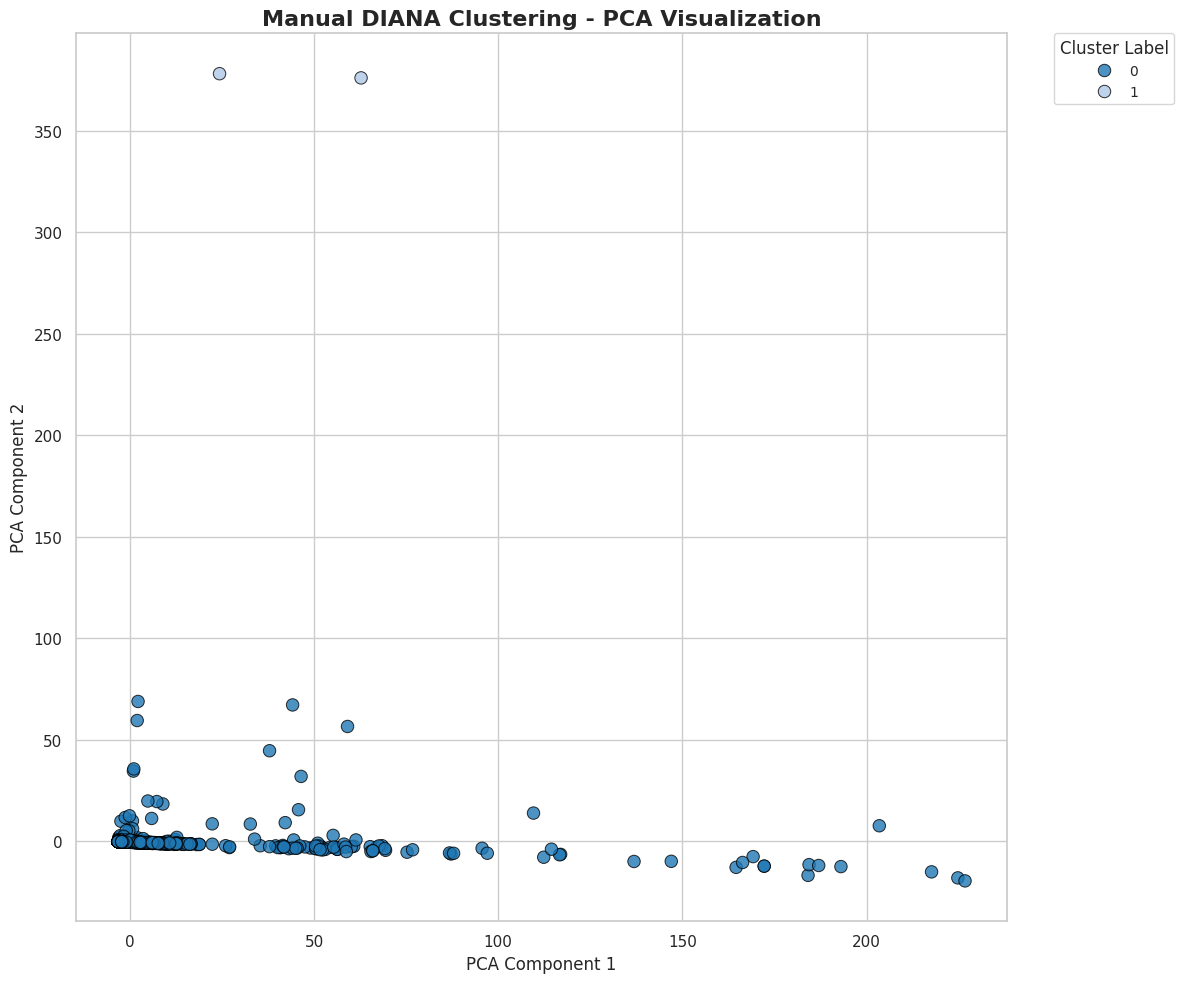

In [42]:

# PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for easy handling
df_pca = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': labels_div
})

# Set up the plot
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

palette = sns.color_palette("tab20", len(df_pca['Cluster'].unique()))
sns.scatterplot(
    data=df_pca,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette=palette,
    s=80,
    edgecolor='black',
    alpha=0.8,
    legend='full'
)

# Titles and labels
plt.title("Manual DIANA Clustering - PCA Visualization", fontsize=16, weight='bold')
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.legend(title='Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10)
plt.tight_layout()
plt.show()

This plot helps you see how your manually implemented DIANA algorithm has separated the data points into different groups in the reduced dimensional space.


Ideally, points belonging to the same cluster will appear close together, forming visually distinct groups.


 The scatter of points within each color and the separation between different color groups indicate the characteristics of your DIANA clustering in this PCA representation.

#Clustering Algorithm Comparision and Inference

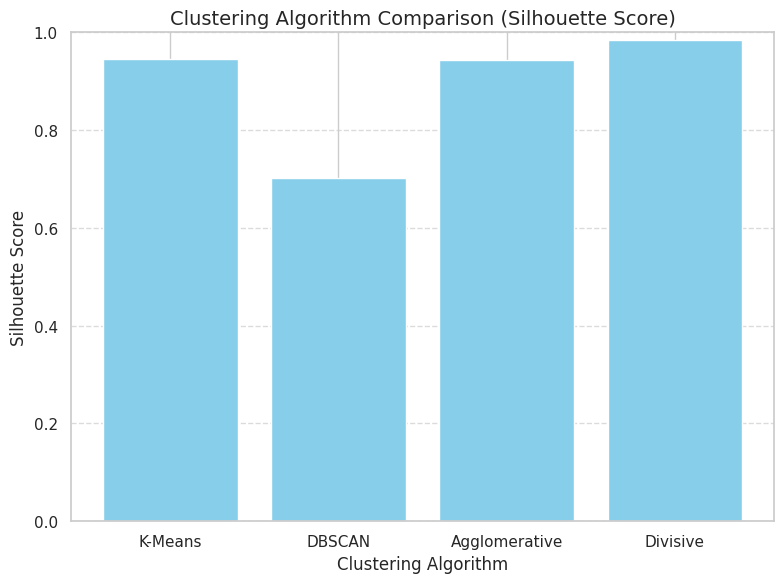

In [43]:

# Dictionary of silhouette scores
sil_scores = {
    'K-Means': KM_sil_score,
    'DBSCAN': DBSCAN_sil_score,
    'Agglomerative': AC_sil_score,
    'Divisive': DC_sil_score
}

# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(sil_scores.keys(), sil_scores.values(), color='skyblue')
plt.xlabel("Clustering Algorithm", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Clustering Algorithm Comparison (Silhouette Score)", fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


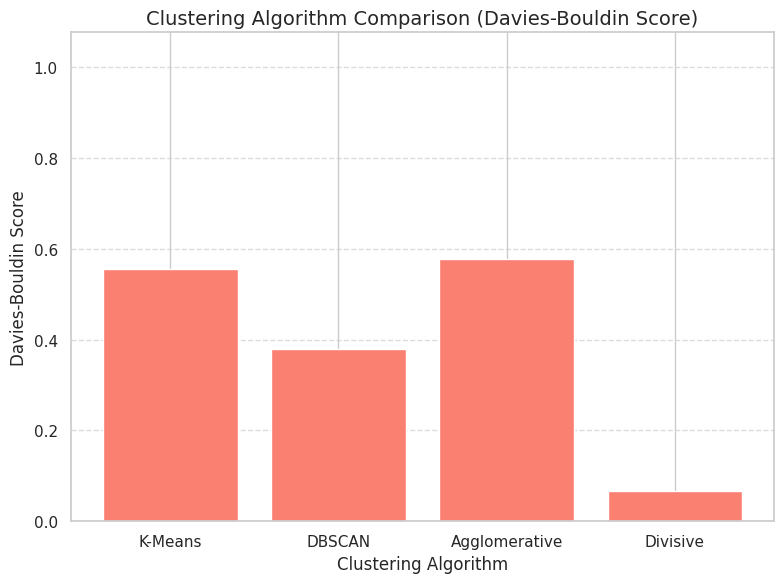

In [44]:

# Dictionary of Davies-Bouldin scores
db_scores = {
    'K-Means': KM_db_score,
    'DBSCAN': DBSCAN_db_score,
    'Agglomerative': AC_db_score,
    'Divisive': DC_db_score
}

# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(db_scores.keys(), db_scores.values(), color='salmon')
plt.xlabel("Clustering Algorithm", fontsize=12)
plt.ylabel("Davies-Bouldin Score", fontsize=12)
plt.title("Clustering Algorithm Comparison (Davies-Bouldin Score)", fontsize=14)
plt.ylim(0, max(db_scores.values()) + 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


> Silhouette Score Insights (Higher is better)

K-Means, Agglomerative, and Divisive Clustering all show high silhouette scores (~0.94), indicating strong intra-cluster similarity and good separation between clusters.

DBSCAN has a noticeably lower silhouette score (~0.70), suggesting that its cluster boundaries are less well-defined for this dataset.


---


> Davies-Bouldin Score Insights (Lower is better)


DBSCAN achieves the lowest DB score (~0.39), meaning it formed well-separated and compact clusters.

K-Means and Agglomerative Clustering have moderate DB scores (~0.58–0.62), indicating reasonable cluster quality.

Divisive Clustering has a high DB score (~1.66), which reflects poor separation and high intra-cluster variance.


---


> **Overall Conclusions**



K-Means and Agglomerative Clustering are well-balanced in terms of both silhouette and DB scores — making them reliable choices.

DBSCAN performs best in DB score but struggles with silhouette score — possibly due to irregular cluster shapes or noise points.

Divisive Clustering shows good silhouette score but poor DB score — indicating it creates visually separated clusters that may lack compactness.

